# SPGR

In [1]:
import version_control

Last run on cashlab03-deb at 2015-03-31 17:02:34.765783

Phypno Version: b550052310b4e17812a33cd1842959d8cca25268

Babel==1.3, Cython==0.22, Jinja2==2.7.3, Markdown==2.6.1, MarkupSafe==0.23, Pillow==2.7.0, PyOpenGL==3.1.0, Pygments==2.0.2, Sphinx==1.3.1, alabaster==0.7.3, bash-kernel==0.3, beautifulsoup4==4.3.2, biopython==1.65, certifi==14.05.14, coverage==3.7.1, decorator==3.4.2, docutils==0.12, easydev==0.8.3, ipython==3.0.0, jedi==0.8.1-final0, jsonschema==2.4.0, matplotlib==1.4.3, memory-profiler==0.32, mistune==0.5.1, networkx==1.9.1, nibabel==2.0.0, nitime==0.5, nltk==3.0.2, nose==1.3.4, numpy==1.9.2, numpydoc==0.5, ordereddict==1.1, pandas==0.16.0, pandocfilters==1.2.3, pep8==1.6.2, pexpect==3.3, pockets==0.2.4, psutil==2.2.1, pycurl==7.19.5.1, pyflakes==0.8.1, pyparsing==2.0.3, pyqtgraph==0.9.10, python-dateutil==2.4.1, python-igraph==0.7.1-4, pytz==2015.2, pyzmq==14.5.0, requests==2.6.0, rope-py3k==0.9.4-1, rpy2==2.5.6, scikit-learn==0.16.0, scipy==0.15.1, six==1.9.0, snowbal

In [2]:
from spgr import lg

## Spindle Properties: Descriptive

In [1]:
from spgr.constants import IMAGES_PATH

In [2]:
images_dir = IMAGES_PATH.joinpath('property_descriptive')
if not images_dir.exists():
    images_dir.mkdir()

In [3]:
from spgr.constants import (HEMI_SUBJ,
                            CHAN_TYPE,
                            DATA_OPTIONS,
                            SPINDLE_OPTIONS,
                            )
from spgr.read_data import get_data
from spgr.detect_spindles import get_spindles
from spgr.spindle_source import get_morph_linear
from spgr.plot_spindles import plot_surf

In [41]:
from IPython.display import display

In [34]:
def get_spindle_density(subj, param, ref):
    """Param: 'density', 'duration', 'peak_freq', 'peak_val'"""
    spindles = get_spindles(subj, chan_type=CHAN_TYPE, reref=ref, **SPINDLE_OPTIONS)
    
    if param == 'density':
        data = get_data(subj, 'sleep', chan_type=CHAN_TYPE, reref=ref, **DATA_OPTIONS)
        chan = data.attr['chan']

        dat_count = spindles.to_data('count')
        n_min = (data.number_of('trial') * (data.axis['time'][0][-1] - data.axis['time'][0][0])) / 60
        values = dat_count.data[0] / n_min
    
    elif param == 'duration':
        for one_spindle in spindles.spindle:
            one_spindle['duration'] = one_spindle['end_time'] - one_spindle['start_time']
        data = spindles.to_data('duration')
        values = data.data[0]
    else:
        data = spindles.to_data(param)
        values = data.data[0]

    return values

In [44]:
def plot_average_values(REF):
    for param in ('density', 'duration', 'peak_val', 'peak_freq'):

        if param == 'density':
            threshold = 0.01, None
            limits = 0, 2
        elif param == 'duration':
            threshold = 0.5, 2
            limits = 1, 1.5
        elif param == 'peak_val':
            threshold = 0.001, None 
            limits = 0, 70
        elif param == 'peak_freq':
            threshold = SPINDLE_OPTIONS['frequency']
            limits = 11, 13

        morphed = []

        for subj in HEMI_SUBJ:

            values = get_spindle_density(subj, param, REF)    
            morphed.append(get_morph_linear(subj, values))

        v = plot_surf(morphed, threshold=threshold, limits=limits)
        v.save(str(images_dir.joinpath('{}_{}.png'.format(param, REF))))
        display(v)

### Reference to Average

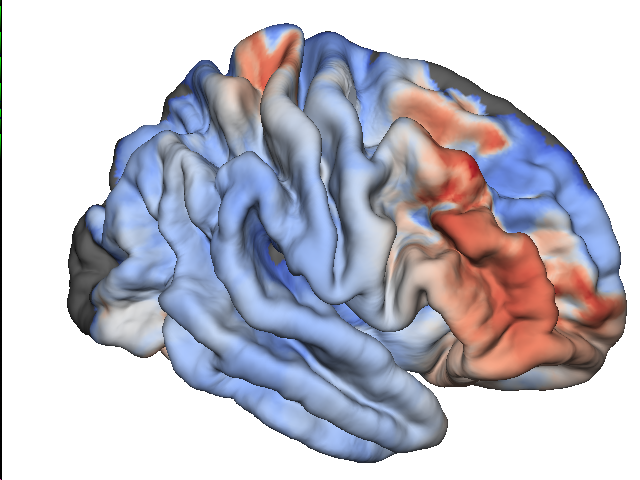

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:50: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN


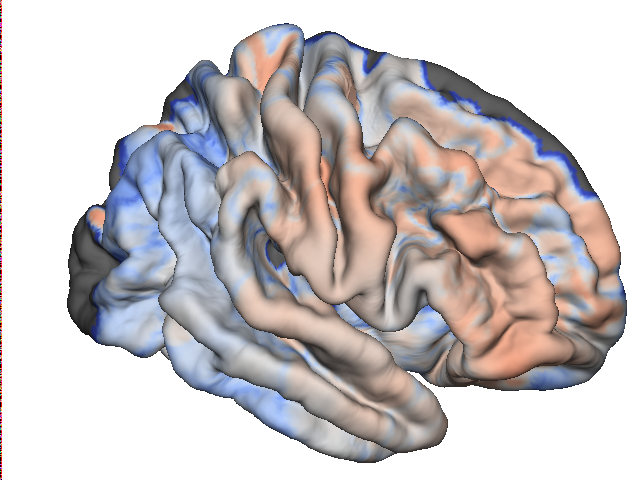

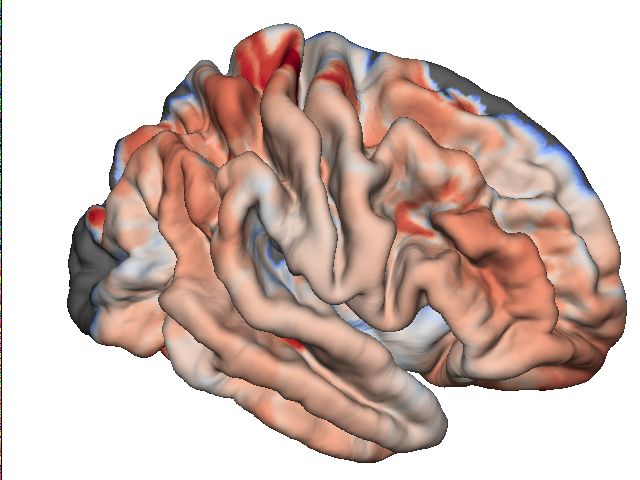

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:50: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN


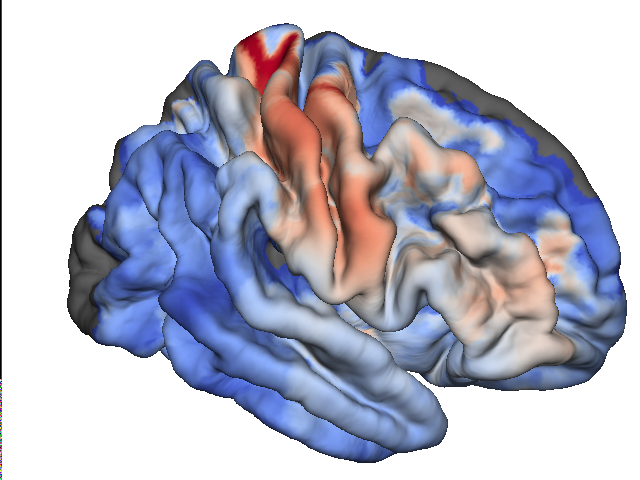

In [45]:
plot_average_values('avg')

### Bipolar Reference

In [46]:
plot_average_values(15)

ValueError: dimension mismatch